<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0926/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# Input data files are available in the "/kaggle/input/110-1-ntut-dl-app-hw1/" directory.
DATA_DIR = '/kaggle/input/ntutemnist/'
TRAIN_DATA_FILE = DATA_DIR + 'emnist-byclass-train.npz'
TEST_DATA_FILE = DATA_DIR + 'emnist-byclass-test.npz'

In [3]:
# Load training data & testing data
data = np.load(TRAIN_DATA_FILE)
train_labels = data['training_labels']
train_images = data['training_images']

test_images = np.load(TEST_DATA_FILE)['testing_images']

In [4]:
print(train_labels.shape)
print(train_images.shape)

(697932, 1)
(697932, 28, 28, 1)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007843,0.007843,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.003922,0.133333,0.329412,0.666667,0.678431,...,0.082353,0.015686,0.007843,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.074510,0.788235,0.913725,0.984314,0.988235,...,0.674510,0.490196,0.321569,0.133333,0.003922,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.031373,0.811765,0.992157,0.996078,0.996078,...,0.996078,0.996078,0.988235,0.952941,0.482353,0.086275,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.352941,0.854902,0.913725,0.850980,...,0.996078,1.000000,0.996078,0.996078,0.909804,0.494118,0.007843,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.003922,0.074510,0.078431,0.015686,...,0.925490,1.000000,1.000000,1.000000,0.992157,0.792157,0.015686,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.921569,1.000000,0.996078,0.996078,0.909804,0.372549,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.996078,0.996078,0.992157,0.866667,0.305882,0.027451,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.996078,0.984314,0.854902,0.356863,0.011765,0.000000,0.000000,0.0,0.0,0.0


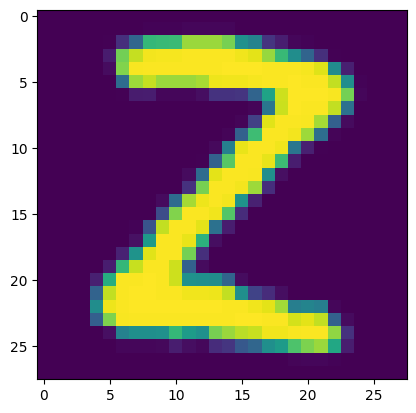

In [5]:
# 只要matplotlib cmap參數: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# 反過來: _r inferno -> inferno_r

# idx: 0-697932
plt.imshow(train_images[0]) #cmap="gray"
pd.DataFrame(train_images[:, :, :, 0][0])

In [6]:
# 攤平(28x28->784) -> Scaling(/255.0)
# tensorflow要求: 輸入 1. 0-1  2. -1-1
trn_images = train_images.reshape((train_images.shape[0], 28 * 28))
trn_images = trn_images.astype('float32') / 255
trn_labels = to_categorical(train_labels)

print(trn_labels.shape)
trn_labels

(697932, 62)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
tst_images = test_images.reshape((test_images.shape[0], 28 * 28))
tst_images = tst_images.astype('float32') / 255

In [9]:
# Comparision: One-Hot
print(train_labels[0])
print(trn_labels[0])

[35]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# tensorflow建立模型需要兩個
# 1. 地基(Model): Sequential(一層一層), Model(自由) 
# 2. 一層層(Layer): Dense(稠密層/全連接層)

layers = [
    Dense(128, activation="relu", input_dim=784),
    # 互斥: 比較傾向softmax(normalize sigmoid)
    # 不互斥: sigmoid
    Dense(62, activation="softmax") # The EMNIST include 52 letters (capital and small letters) and 10 digits. 
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 62)                7998      
                                                                 
Total params: 108,478
Trainable params: 108,478
Non-trainable params: 0
_________________________________________________________________


In [11]:
# mse: 可以, 但訓練起來(loss min)很花時間, 
# 回歸時候使用可以, 分類太花時間
# 分類: loss -> Cross Entropy
# 如果最後只有一個神經元輸出(sigmoid激活): BinaryCrossEntropy
# p log1/q + (1-p) log(1/1-q)
# 如果最後是多個神經元輸出(softmax激活): CategoricalCrossEntropy
# p1 log1/q1 + p2 log1/q2

model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [13]:
# batch: 爽就好, 圖片小: 100筆一次 圖片大:20比一次
# 60000筆: 54000筆(訓練) / 100 = 540次細數調整
# epochs: 54000筆 要看 幾遍 -> 什麼時候要停(不要過擬和, val_loss平滑就停)
# epochs=10, 540次 * 10(epoch) -> 5400次
# verbose: log印多少 預設1:進度條  0:無聲  2:除了進度條都有
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
cs = [
    # 存檔
    # ModelCheckpoint("mnist.h5", save_best_only=True),
    # 提早停止
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(trn_images,
     trn_labels,
     batch_size=100,
     epochs=10,
     validation_split=0.1,
     callbacks=cs,
     verbose=1)

Epoch 1/10
6282/6282 [==============================] - 32s 5ms/step - loss: 1.1038 - accuracy: 0.6843 - val_loss: 1.0611 - val_accuracy: 0.6966
Epoch 2/10
6282/6282 [==============================] - 33s 5ms/step - loss: 1.0247 - accuracy: 0.7047 - val_loss: 0.9953 - val_accuracy: 0.7135
Epoch 3/10
6282/6282 [==============================] - 32s 5ms/step - loss: 0.9662 - accuracy: 0.7204 - val_loss: 0.9448 - val_accuracy: 0.7265
Epoch 4/10
6282/6282 [==============================] - 33s 5ms/step - loss: 0.9169 - accuracy: 0.7332 - val_loss: 0.8985 - val_accuracy: 0.7392
Epoch 5/10
6282/6282 [==============================] - 33s 5ms/step - loss: 0.8732 - accuracy: 0.7440 - val_loss: 0.8584 - val_accuracy: 0.7478
Epoch 6/10
6282/6282 [==============================] - 33s 5ms/step - loss: 0.8344 - accuracy: 0.7538 - val_loss: 0.8211 - val_accuracy: 0.7578
Epoch 7/10
6282/6282 [==============================] - 32s 5ms/step - loss: 0.8003 - accuracy: 0.7620 - val_loss: 0.7913 - val_ac

In [15]:
pre = model.predict(tst_images).argmax(axis=-1)
pre

3636/3636 [==============================] - 7s 2ms/step


array([ 1, 36,  0, ..., 55, 28, 24])

In [ ]:
# Print results in CSV format and upload to Kaggle
with open('pred_results.csv', 'w') as f:
    f.write('Id,Category\n')
    for i in range(len(results)):
        f.write(str(i) + ',' + str(results[i]) + '\n')